<a href="https://colab.research.google.com/github/AnaliaLeyez/AnaliaLeyez/blob/main/ej_u5_media_movil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo de tratamiento de series temporales - Media Movil

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

In [ ]:
# Crear un DataFrame de ejemplo con más variabilidad
np.random.seed(0)  # Para reproducibilidad
data = {
    'Fecha': pd.date_range(start='2025-01-01', periods=100, freq='D'),
    'Valor': np.random.normal(loc=0.0, scale=1.0, size=100).cumsum() + np.linspace(0, 10, 100)
}
df = pd.DataFrame(data)
df.set_index('Fecha', inplace=True)

In [ ]:
df

,Valor
Fecha,
2025-01-01,1.764052
2025-01-02,2.265220
2025-01-03,3.344968
2025-01-04,5.686871
2025-01-05,7.655439
...,...
2025-04-06,13.251489
2025-04-07,13.362999
2025-04-08,15.249880


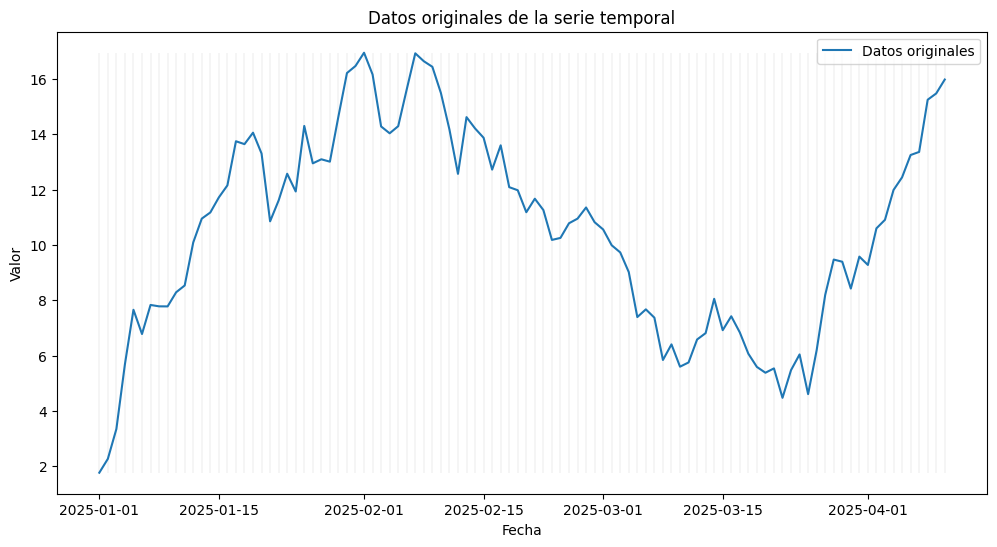

In [ ]:
# Visualizar los datos originales
plt.figure(figsize=(12, 6))
plt.vlines(df.index, ymin=min(df['Valor']), ymax=max(df['Valor']), color='lightgray', linewidth=0.3)

plt.plot(df.index, df['Valor'], label='Datos originales')
plt.title('Datos originales de la serie temporal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [ ]:
# Aplicar una media móvil
df['MediaMovil_7'] = df['Valor'].rolling(window=7).mean() #Para cada fila
df['MediaMovil_15'] = df['Valor'].rolling(window=15).mean() #Para cada fila

In [ ]:
df

,Valor,MediaMovil_7,MediaMovil_15
Fecha,,,
2025-01-01,1.764052,NaN,NaN
2025-01-02,2.265220,NaN,NaN
2025-01-03,3.344968,NaN,NaN
2025-01-04,5.686871,NaN,NaN
2025-01-05,7.655439,NaN,NaN
...,...,...,...
2025-04-06,13.251489,11.149264,9.055917
2025-04-07,13.362999,11.689934,9.581843
2025-04-08,15.249880,12.543326,10.195783


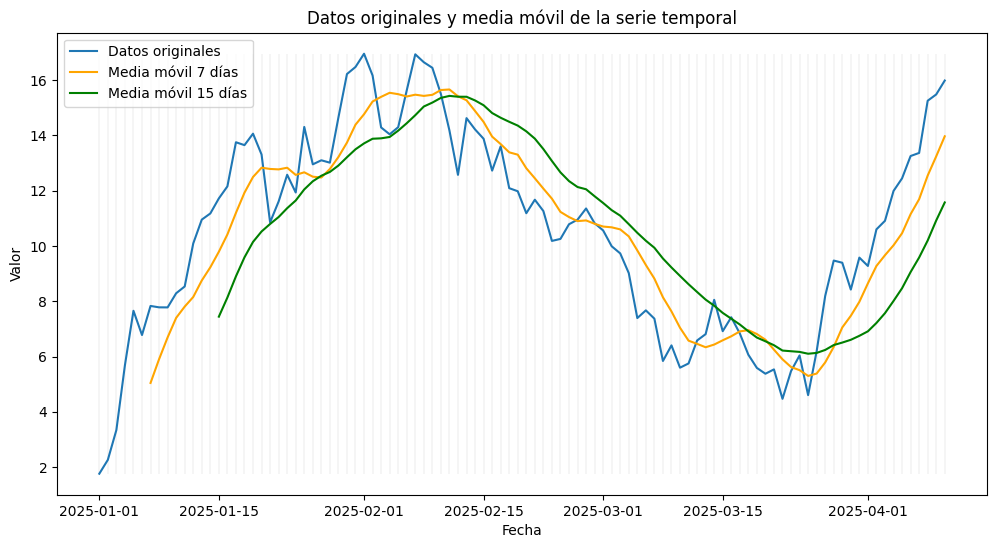

In [ ]:
# Visualizar la serie temporal con la media móvil
plt.figure(figsize=(12, 6))
plt.vlines(df.index, ymin=min(df['Valor']), ymax=max(df['Valor']), color='lightgray', linewidth=0.3)

plt.plot(df.index, df['Valor'], label='Datos originales')
plt.plot(df.index, df['MediaMovil_7'], label='Media móvil 7 días', color='orange')
plt.plot(df.index, df['MediaMovil_15'], label='Media móvil 15 días', color='green')

plt.title('Datos originales y media móvil de la serie temporal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [ ]:
# Estimar próximo valor
ultimo_valor_estimado = df['Valor'].iloc[-5:].mean()
print(f"Estimación para el próximo día con SMA({5}): {ultimo_valor_estimado:.2f}")

Estimación para el próximo día con SMA(5): 14.66


Suavizar fluctuaciones: Reduce el "ruido" en datos volátiles.

Identificar tendencias: Ayuda a ver la dirección general (↑, ↓, →).

Preparar datos para modelos: Alisa series antes de aplicar ARIMA u otros.

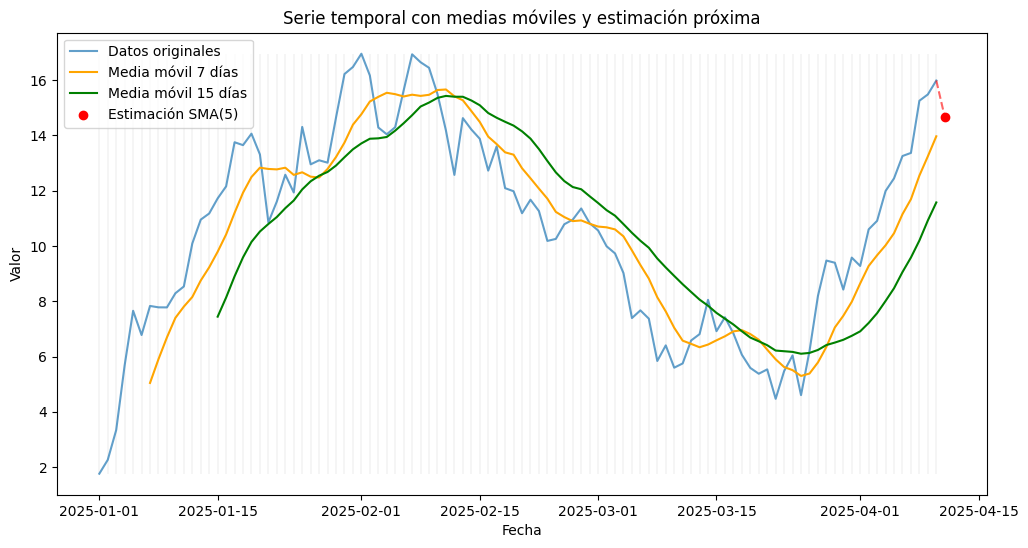

Estimación para el próximo día con SMA(5): 14.66


In [ ]:


proxima_fecha = df.index[-1] + pd.Timedelta(days=1)
plt.figure(figsize=(12, 6))
plt.vlines(df.index, ymin=min(df['Valor']), ymax=max(df['Valor']), color='lightgray', linewidth=0.3)

plt.plot(df.index, df['Valor'], label='Datos originales', alpha=0.7)
plt.plot(df.index, df['MediaMovil_7'], label='Media móvil 7 días', color='orange')
plt.plot(df.index, df['MediaMovil_15'], label='Media móvil 15 días', color='green')

plt.scatter(proxima_fecha, ultimo_valor_estimado, color='red', label='Estimación SMA(5)', zorder=5)
plt.plot([df.index[-1], proxima_fecha],
         [df['Valor'].iloc[-1], ultimo_valor_estimado],
         color='red', linestyle='--', alpha=0.6)

plt.title('Serie temporal con medias móviles y estimación próxima')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

print(f"Estimación para el próximo día con SMA(5): {ultimo_valor_estimado:.2f}")